# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3. Wrangle the Data
### 4. Time-series analysis
##### Decomposition
##### Testing for stationarity
### 5. Stationarize the Data
##### Differencing the data
##### Testing for stationarity

# 1. Import Librairies

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 2. Import Data

In [2]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 6\Film_Industry'

In [3]:
#Create data frame for the "movie_data_cleaned_35yr" data set
movie_data= pd.read_pickle(os.path.join(path,'Data','Prepared Data','movie_data_final.pkl'))

In [4]:
#Check the shape of the movie_data data set
movie_data.shape

(7000, 13)

In [5]:
movie_data.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime
641,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States of America,38934048.0,Universal Pictures,94
642,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States of America,63980721.0,Warner Bros.,114
643,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States of America,381906762.0,Universal Pictures,116
644,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States of America,17307019.0,SLM Production Group,116
645,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States of America,14643997.0,Paramount Pictures,94


# 3. Wrangle the data

In [6]:
movie_data['yearly_gross_revenue'] = movie_data.groupby(['release_year'])['gross_revenue'].transform(np.sum)

In [7]:
movie_data.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime,yearly_gross_revenue
641,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States of America,38934048.0,Universal Pictures,94,5.497389e+09
642,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States of America,63980721.0,Warner Bros.,114,5.497389e+09
643,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States of America,381906762.0,Universal Pictures,116,5.497389e+09
644,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States of America,17307019.0,SLM Production Group,116,5.497389e+09
645,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States of America,14643997.0,Paramount Pictures,94,5.497389e+09


In [8]:
#Export data set
movie_data.to_csv(os.path.join(path,'Data','Prepared Data', 'movie_data_to_be_aggregated.csv'),index=False)

In [9]:
#Import data set with aggregated gross revenue per year
yearly_gross_rev= pd.read_csv(os.path.join(path,'Data','Prepared Data','yearly_revenue.csv'), sep = ';', index_col = False)

In [10]:
yearly_gross_rev.head(36)

,Year,Yearly_gross_revenue
0,1985,5497388714
1,1986,4746742794
2,1987,4975632219
3,1988,5547034104
4,1989,6950932246
5,1990,7510884333
6,1991,6568836656
7,1992,8119332687
8,1993,8210992331
9,1994,9219958747


In [11]:
yearly_gross_rev.shape

(35, 2)

In [12]:
#Set the Year column as the dataframe's index
yearly_gross_rev['datetime'] = pd.to_datetime(yearly_gross_rev['Year'], format='%Y')
yearly_gross_rev.set_index('datetime', inplace=True)
yearly_gross_rev.index.freq = pd.infer_freq(yearly_gross_rev.index)

#Drop the "Year" column.
yearly_gross_rev.drop(['Year'], axis=1, inplace=True)

In [13]:
yearly_gross_rev.head()

,Yearly_gross_revenue
datetime,
1985-01-01,5497388714
1986-01-01,4746742794
1987-01-01,4975632219
1988-01-01,5547034104
1989-01-01,6950932246


In [14]:
#Check for the shape of the dataframe
yearly_gross_rev.shape

(35, 1)

In [15]:
#Check for missing values
yearly_gross_rev.isnull().sum() 

Yearly_gross_revenue    0
dtype: int64

No missing value was found.

In [16]:
#Check for duplicates
dups = yearly_gross_rev.duplicated()
dups.sum()


0

No duplicates were found.

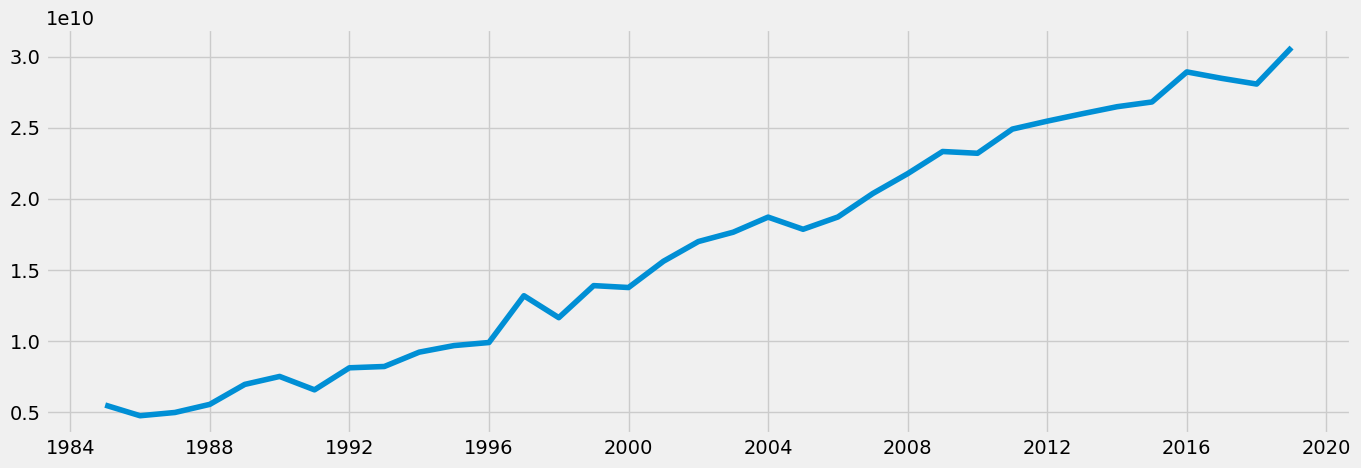

In [17]:
#Plot the data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(yearly_gross_rev)

# 4. Time-series analysis

### Decomposition

In [18]:
#Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(yearly_gross_rev, model='additive')

In [19]:
#Define a fixed size for all special charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

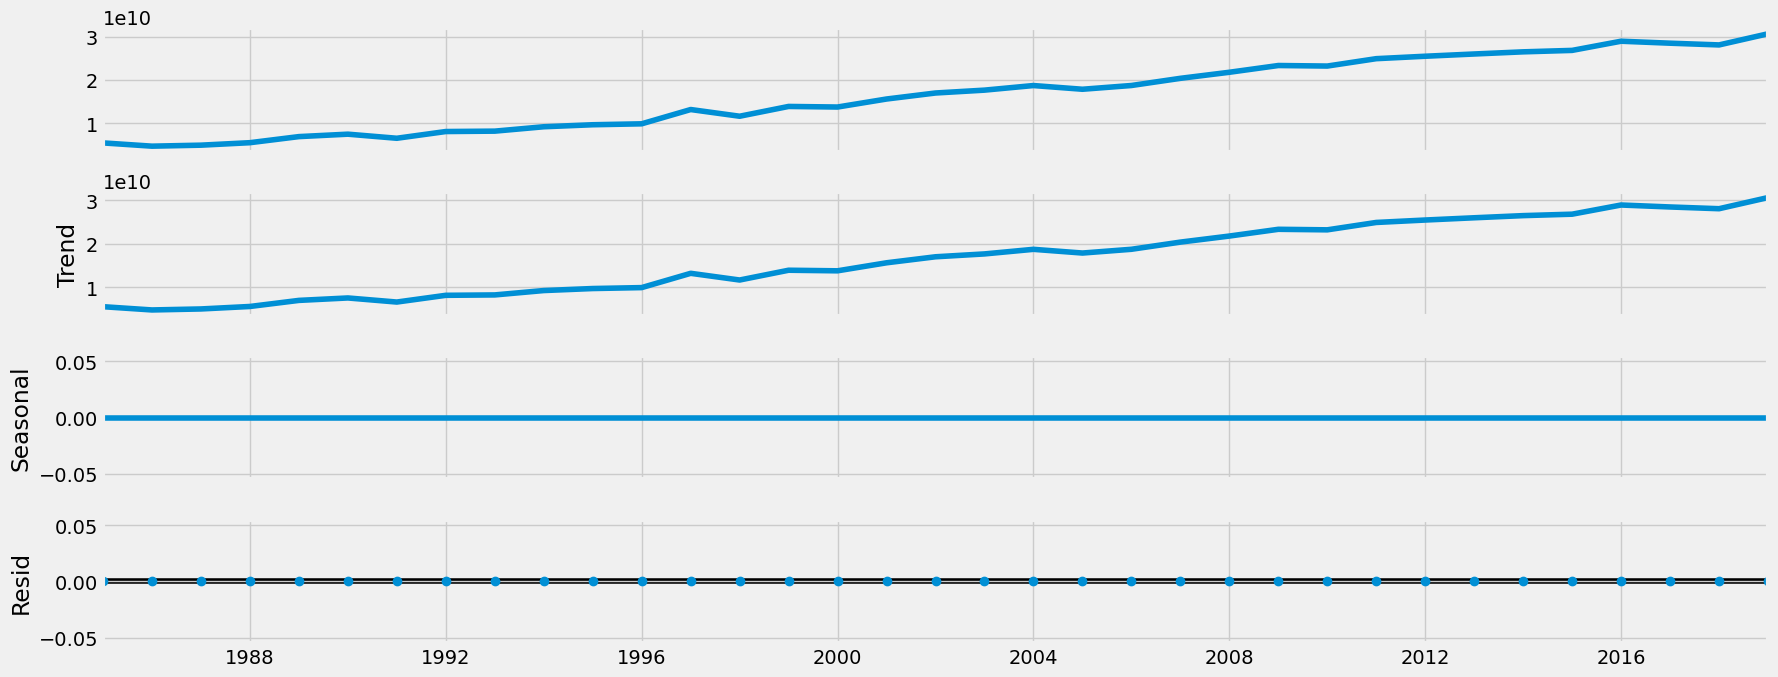

In [20]:
#Plot the separate components
decomposition.plot()
plt.show()

We can see a long-term upward trend in the data. It means that there has been an increase in US gross revenue of the top 200 movies released each year, between 1985 and 2019. There are no cycles or seasonality in this data set, and no noise.

Because of the upward trend, we suspect that the data is not stationary.

### Testing for stationarity

Null hypothesis: There is a unit root. Alternative hypothesis: There is no unit root. 

If the null hypothesis is disproven, it means there is no unit root and the data is therefore stationary.

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#Apply the test using the function on the time series
dickey_fuller(yearly_gross_rev['Yearly_gross_revenue'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.596708
p-value                         0.987534
Number of Lags Used             4.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


The p-value is relatively high (above 0.05) and the test statistic is larger than the critical value at the 10% significance levels. The data is non-stationary and it will therefore need to be stationarize. Before starting this process, we will create a plot to check for autocorrelations.

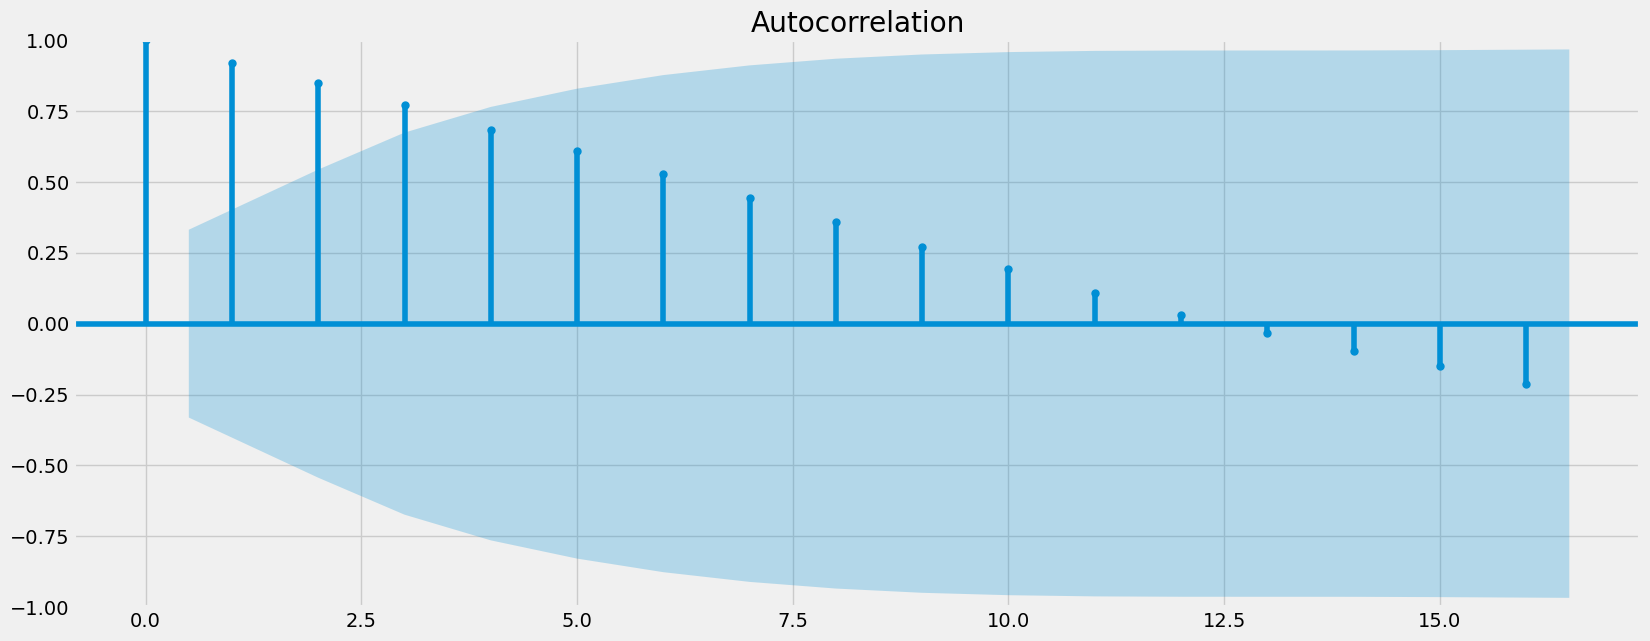

In [22]:
#Create a plot to check for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(yearly_gross_rev)
plt.show()

The data has a trend and is non-stationary, as some of the lags are significantly correlated with each other (they go outside of the confidence level). I will therefore do a round of differencing try to stationarize the data.

# 5. Stationarize the  Data

### Differencing the data

In [30]:
data_diff = yearly_gross_rev - yearly_gross_rev.shift(1)

In [24]:
#Removing the missing values created during the differencing process
data_diff.dropna(inplace = True)

In [25]:
data_diff.head()

,Yearly_gross_revenue
datetime,
1986-01-01,-7.506459e+08
1987-01-01,2.288894e+08
1988-01-01,5.714019e+08
1989-01-01,1.403898e+09
1990-01-01,5.599521e+08


In [26]:
#Check the columns in the data_diff data set
data_diff.columns

Index(['Yearly_gross_revenue'], dtype='object')

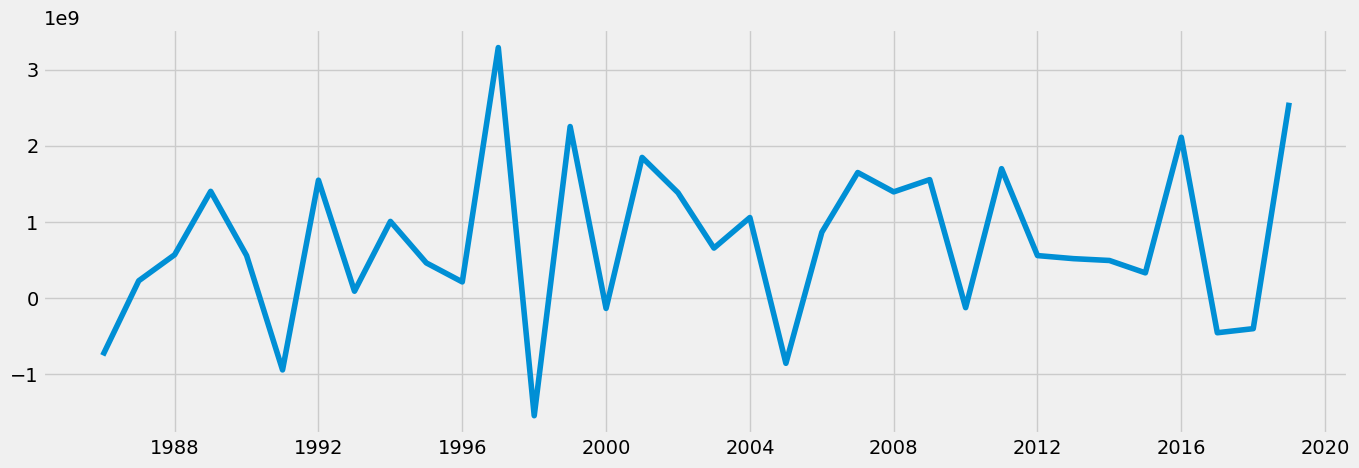

In [27]:
#Plot the differenciated data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Testing for stationarity

In [28]:
#Check for autocorrelation in the differenciated data set
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.947243
p-value                         0.001713
Number of Lags Used             3.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


The p-value is now significant (p<0.05) and the test statistic value is smaller than the critical value at both the 1 and 5 percent significance levels. We can therefore reject the null hypothesis and consider this data stationary.

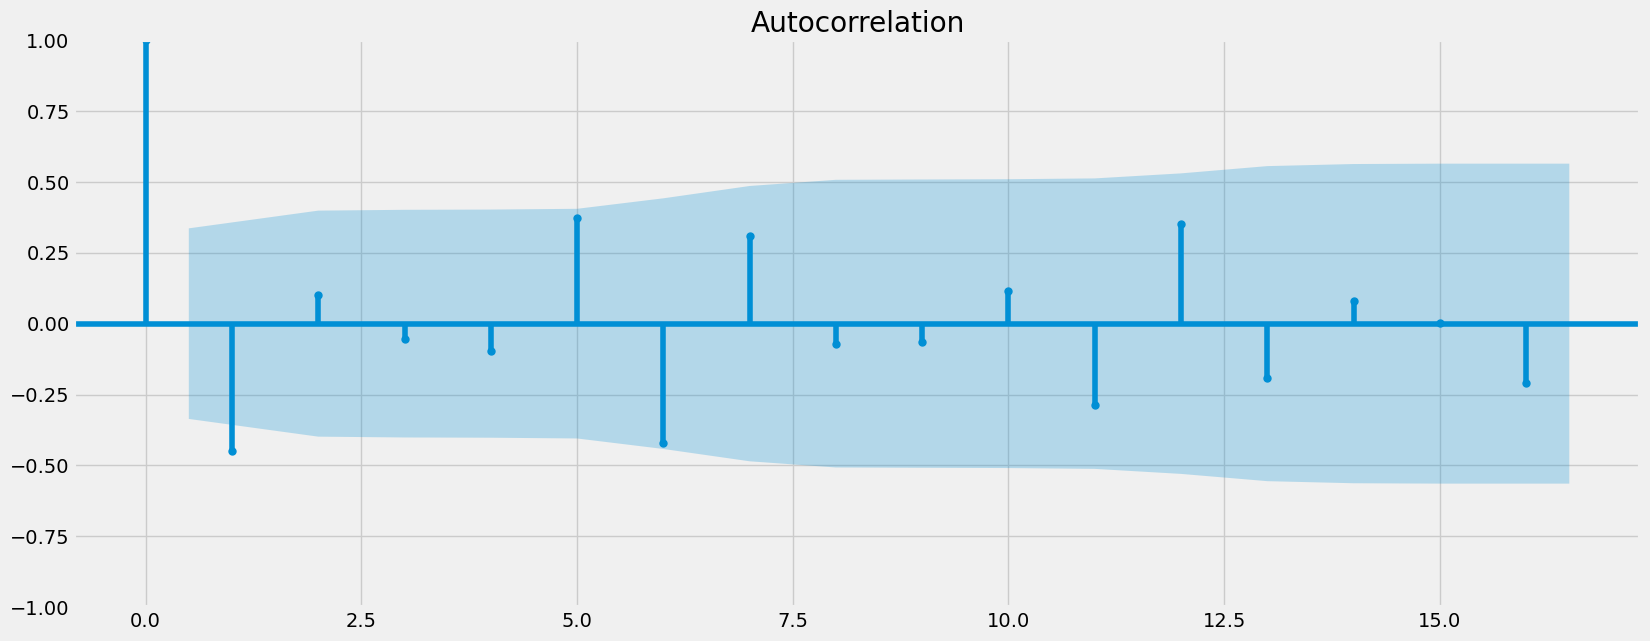

In [29]:
plot_acf(data_diff)
plt.show()

##### Only two of the lags are still outside of the confidence level, so I will not perform another round of differencing.

It is important to note that as we did a round of differencing on our data, this new version of the data set could contain slightly overdifferenced or underdifferenced data.